In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

id                                0
price                             0
description                       2
neighborhood_overview           410
host_since                        0
host_location                   637
host_response_time              131
host_response_rate              131
host_acceptance_rate             89
host_is_superhost                 0
host_neighbourhood             1556
host_listings_count               0
host_verifications                0
host_identity_verified            0
neighbourhood                   409
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                        268
beds                             21
amenities                         0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating        

In [4]:
clean_train = train.copy()
#clean_test = test.copy()

In [5]:
dropcolumns = ['description','host_since','neighborhood_overview','host_location','host_neighbourhood','neighbourhood','neighbourhood_cleansed','property_type']

In [6]:
clean_train = clean_train.drop(dropcolumns, axis=1)
#clean_test = clean_test.drop(dropcolumns, axis=1)
clean_train

,id,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2000,126,within a few hours,100%,75%,f,1.0,"['email', 'phone']",f,-33.98233,...,4,5.00,5.00,5.00,4.75,5.00,4.75,5.00,f,0.40
1,2001,248,within an hour,100%,94%,f,32.0,"['email', 'phone']",t,-33.87019,...,14,4.07,4.36,3.64,4.57,4.57,4.86,3.93,f,4.67
2,2002,164,within an hour,100%,98%,t,2.0,"['email', 'phone']",t,-33.90163,...,229,4.94,4.96,4.96,4.86,4.98,4.86,4.90,t,4.86
3,2003,475,NaN,NaN,100%,f,1.0,"['email', 'phone']",t,-33.89327,...,2,5.00,5.00,4.50,5.00,5.00,5.00,5.00,t,0.06
4,2004,263,within an hour,100%,97%,f,2.0,"['email', 'phone']",t,-33.86902,...,247,4.74,4.85,4.82,4.49,4.73,4.98,4.69,t,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5995,1001,within a few hours,100%,49%,f,1.0,"['email', 'phone']",f,-33.89289,...,6,5.00,5.00,5.00,5.00,5.00,5.00,4.83,f,0.63
3996,5996,133,within an hour,98%,93%,f,10.0,"['email', 'phone']",t,-33.93403,...,20,4.60,4.70,4.70,4.85,4.70,4.80,4.55,f,1.88
3997,5997,151,within an hour,95%,71%,f,68.0,"['email', 'phone', 'work_email']",t,-33.89061,...,19,4.79,4.84,4.84,5.00,4.95,5.00,4.84,f,0.49
3998,5998,35,NaN,NaN,100%,f,2.0,"['email', 'phone']",t,-33.95479,...,65,4.60,4.59,4.49,4.77,4.84,4.53,4.66,f,1.02


In [7]:
clean_train['host_response_time'] = clean_train['host_response_time'].fillna('NA')
clean_train['host_response_time'].value_counts()

within an hour        2745
within a few hours     641
within a day           352
NA                     131
a few days or more     131
Name: host_response_time, dtype: int64

In [8]:
host_response_time_cate = {
    "within an hour":1,
    "within a few hours":2,
    "within a day":3,
    "NA":5,
    "a few days or more":4.   
}
clean_train['host_response_time'] = clean_train['host_response_time'].replace(host_response_time_cate).astype(int)
#clean_test['host_response_time'] = clean_test['host_response_time'].replace(host_response_time_cate)

In [9]:
clean_train['host_response_rate'] = clean_train['host_response_rate'].str.replace('%','')
clean_train['host_response_rate'] = clean_train['host_response_rate'].fillna(100)
clean_train['host_response_rate'] = clean_train['host_response_rate'].astype(int)
clean_train['host_response_rate']

0       100
1       100
2       100
3       100
4       100
       ... 
3995    100
3996     98
3997     95
3998    100
3999     95
Name: host_response_rate, Length: 4000, dtype: int64

In [10]:
clean_train['host_acceptance_rate'] = clean_train['host_acceptance_rate'].str.replace('%','')
clean_train['host_acceptance_rate'] = clean_train['host_acceptance_rate'].fillna(0)
clean_train['host_acceptance_rate'] = clean_train['host_acceptance_rate'].astype(int)
clean_train['host_acceptance_rate']

0        75
1        94
2        98
3       100
4        97
       ... 
3995     49
3996     93
3997     71
3998    100
3999     93
Name: host_acceptance_rate, Length: 4000, dtype: int64

In [11]:
clean_train['room_type'].value_counts()

Entire home/apt    3203
Private room        727
Hotel room           60
Shared room          10
Name: room_type, dtype: int64

In [12]:
room_cate = {
    "Entire home/apt":1,
    "Private room":2,
    "Hotel room":3,
    "Shared room":4.   
}
clean_train['room_type'] = clean_train['room_type'].replace(room_cate).astype(int)
#test['room_type'] = test['room_type'].replace(roon_cate)
clean_train['room_type']

0       2
1       1
2       1
3       1
4       1
       ..
3995    2
3996    1
3997    1
3998    2
3999    1
Name: room_type, Length: 4000, dtype: int64

In [13]:
clean_train['beds'].fillna(clean_train['accommodates'],inplace=True)
clean_train['bedrooms'].fillna(clean_train['beds'],inplace=True)

In [14]:
amen= []
for i in range(train.shape[0]):
    amen.append(len(clean_train.iloc[i,15].split(',')))
clean_train['amenities'] = amen
clean_train['amenities']

0       30
1       40
2       41
3       33
4       32
        ..
3995    43
3996    14
3997    18
3998    31
3999    39
Name: amenities, Length: 4000, dtype: int64

In [15]:
number_verifi = []

for i in range(train.shape[0]):
    number_verifi.append(len(clean_train.iloc[i,7].split(',')))
clean_train['host_verifications'] = number_verifi
clean_train['host_verifications']

0       2
1       2
2       2
3       2
4       2
       ..
3995    2
3996    2
3997    3
3998    2
3999    2
Name: host_verifications, Length: 4000, dtype: int64

In [26]:
location = []
for i in range(clean_train.shape[0]):
    benchmark = np.array([-33.870453, 151.208755])
    lat_long = np.array([clean_train.iloc[i,16],train.iloc[i,17]])
    distance = np.linalg.norm(lat_long-benchmark)
    location.append(distance)

clean_train['Distance'] = location

In [31]:
clean_train['logprice']=np.log(clean_train['price'])
#clean_test['logprice']=np.log(clean_test['price'])

In [16]:
clean_train[['instant_bookable','host_identity_verified','host_is_superhost']] = pd.get_dummies(clean_train[['instant_bookable','host_identity_verified','host_is_superhost']], drop_first=True)

In [32]:
clean_train

,id,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,latitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,Distance,logprice
0,2000,126,2,100,75,0,1.0,2,0,-33.98233,...,5.00,5.00,4.75,5.00,4.75,5.00,0,0.40,35.870463,4.836282
1,2001,248,1,100,94,0,32.0,2,1,-33.87019,...,4.36,3.64,4.57,4.57,4.86,3.93,0,4.67,35.870456,5.513429
2,2002,164,1,100,98,1,2.0,2,1,-33.90163,...,4.96,4.96,4.86,4.98,4.86,4.90,1,4.86,36.870453,5.099866
3,2003,475,5,100,100,0,1.0,2,1,-33.89327,...,5.00,4.50,5.00,5.00,5.00,5.00,1,0.06,40.870479,6.163315
4,2004,263,1,100,97,0,2.0,2,1,-33.86902,...,4.85,4.82,4.49,4.73,4.98,4.69,1,5.75,34.870453,5.572154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5995,1001,2,100,49,0,1.0,2,0,-33.89289,...,5.00,5.00,5.00,5.00,5.00,4.83,0,0.63,35.870507,6.908755
3996,5996,133,1,98,93,0,10.0,2,1,-33.93403,...,4.70,4.70,4.85,4.70,4.80,4.55,0,1.88,34.870496,4.890349
3997,5997,151,1,95,71,0,68.0,3,1,-33.89061,...,4.84,4.84,5.00,4.95,5.00,4.84,0,0.49,123.870475,5.017280
3998,5998,35,5,100,100,0,2.0,2,1,-33.95479,...,4.59,4.49,4.77,4.84,4.53,4.66,0,1.02,123.870577,3.555348


In [33]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4000 non-null   int64  
 1   price                        4000 non-null   int64  
 2   host_response_time           4000 non-null   int64  
 3   host_response_rate           4000 non-null   int64  
 4   host_acceptance_rate         4000 non-null   int64  
 5   host_is_superhost            4000 non-null   uint8  
 6   host_listings_count          4000 non-null   float64
 7   host_verifications           4000 non-null   int64  
 8   host_identity_verified       4000 non-null   uint8  
 9   latitude                     4000 non-null   float64
 10  longitude                    4000 non-null   float64
 11  room_type                    4000 non-null   int64  
 12  accommodates                 4000 non-null   int64  
 13  bedrooms          

In [34]:
clean_train.isnull().sum()

id                             0
price                          0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_verifications             0
host_identity_verified         0
latitude                       0
longitude                      0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
amenities                      0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
reviews_per_month              0
Distance                       0
logprice                       0
dtype: int

In [35]:
clean_train.corr()['logprice'].sort_values()

room_type                     -0.477595
number_of_reviews             -0.132850
instant_bookable              -0.112784
reviews_per_month             -0.107699
Distance                      -0.075971
minimum_nights                -0.075969
review_scores_value           -0.042912
host_acceptance_rate          -0.041329
maximum_nights                -0.019390
id                            -0.012651
host_is_superhost             -0.012549
host_identity_verified         0.035507
host_response_time             0.047109
host_response_rate             0.061510
review_scores_checkin          0.065444
review_scores_communication    0.066086
host_verifications             0.075365
review_scores_accuracy         0.081060
host_listings_count            0.092621
review_scores_cleanliness      0.097975
review_scores_rating           0.132451
amenities                      0.198743
review_scores_location         0.218745
latitude                       0.219251
longitude                      0.323453


<AxesSubplot:>

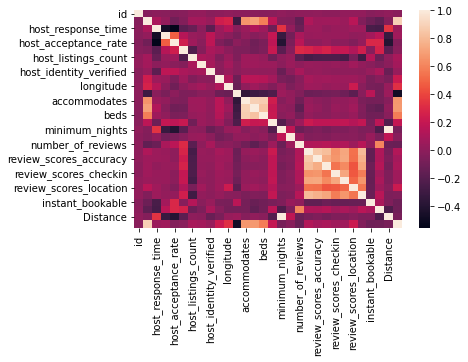

In [36]:
sns.heatmap(clean_train.corr())